
## Word2Vec Model
- Word2Vec Google's Pretrained Model
- Contains vector representations of 50 billion words

- Words which are similar in context have similar vectors
- Distance/Similarity between two words can be measured using Cosine Distance


### Applications
- Text Similarity
- Language Translation
- Finding Odd Words
- Word Analogies


### Word Embeddings
- Word embeddings are numerical representation of words, in the form of vectors.

- Word2Vec Model represents each word as 300 Dimensional Vector

- In this tutorial we are going to see how to use pre-trained word2vec model.
- Model size is around 1.5 GB
- We will work using Gensim, which is popular NLP Package.


Gensim's Word2Vec Model provides optimum implementation of 

1) **CBOW** Model 

2) **SkipGram Model**


Paper 1 [Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781.pdf)


Paper 2 [Distributed Representations of Words and Phrases and their Compositionality
](https://arxiv.org/abs/1310.4546)

### Word2Vec using Gensim
`Link https://radimrehurek.com/gensim/models/word2vec.html`

### CODE ##

##### Load Word2Vec Model


**KeyedVectors** - This object essentially contains the mapping between words and embeddings. After training, it can be used directly to query those embeddings in various ways

In [62]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
word_vectors = KeyedVectors.load_word2vec_format('word2vec-applications-transfer-learning-nlp-master/GoogleNews-vectors-negative300.bin',binary=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [64]:
v_apple = word_vectors["apple"] 
v_mango = word_vectors["india"]

In [65]:
print(v_apple.shape)
print(v_mango.shape)

(300,)
(300,)


In [66]:
cosine_similarity([v_mango],[v_apple])

array([[0.17158598]], dtype=float32)

In [67]:
import numpy as np

## 1. Find the Odd One Out

In [68]:
def odd_one_out(words):
    """Accepts a list of words and returns the odd word"""
    
    # Generate all word embeddings for the given list
    all_word_vectors = [word_vectors[w] for w in words]
    avg_vector = np.mean(all_word_vectors,axis=0)
    print(avg_vector.shape)
    
    #Iterate over every word and find similarity
    odd_one_out = None
    min_similarity = 1.0 #Very high value
    
    for w in words:
        sim = cosine_similarity([word_vectors[w]],[avg_vector])
        if sim < min_similarity:
            min_similarity = sim
            odd_one_out = w
    
        print("Similairy btw %s and avg vector is %.2f"%(w,sim))
            
    return odd_one_out

In [69]:
input_1 = ["apple","mango","juice","party","orange"] 
input_2 = ["music","dance","sleep","dancer","food"]        
input_3  = ["match","player","football","cricket","dancer"]
input_4 = ["india","paris","russia","france","germany"]

In [70]:
odd_one_out(input_1) 

(300,)
Similairy btw apple and avg vector is 0.78
Similairy btw mango and avg vector is 0.76
Similairy btw juice and avg vector is 0.71
Similairy btw party and avg vector is 0.36
Similairy btw orange and avg vector is 0.65


'party'

In [71]:
odd_one_out(input_2) 

(300,)
Similairy btw music and avg vector is 0.66
Similairy btw dance and avg vector is 0.81
Similairy btw sleep and avg vector is 0.51
Similairy btw dancer and avg vector is 0.72
Similairy btw food and avg vector is 0.52


'sleep'

In [72]:
odd_one_out(input_3)

(300,)
Similairy btw match and avg vector is 0.58
Similairy btw player and avg vector is 0.68
Similairy btw football and avg vector is 0.72
Similairy btw cricket and avg vector is 0.70
Similairy btw dancer and avg vector is 0.53


'dancer'

In [73]:
odd_one_out(input_4)

(300,)
Similairy btw india and avg vector is 0.81
Similairy btw paris and avg vector is 0.75
Similairy btw russia and avg vector is 0.79
Similairy btw france and avg vector is 0.81
Similairy btw germany and avg vector is 0.84


'paris'

### 2. Word Analogies

`man -> woman :: 	prince -> princess`  
`italy -> italian :: 	spain -> spanish`  
`india -> delhi :: 	japan -> tokyo`  
`man -> woman :: 	boy -> girl`  
`small -> smaller :: 	large -> larger`  

#### Try it out 


`man -> coder :: woman -> ______?`


In [74]:
type(word_vectors.vocab)

dict

In [75]:
word_vectors["man"].shape

(300,)

In [76]:
def predict_word(a,b,c,word_vectors):
    """Accepts a triad of words, a,b,c and returns d such that a is to b : c is to d"""
    a,b,c = a.lower(),b.lower(),c.lower()
    
    # similarity |b-a| = |d-c| should be max
    max_similarity = -100 
    
    d = None
    
    words = word_vectors.vocab.keys()
    
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    
    #to find d s.t similarity(|b-a|,|d-c|) should be max
    
    for w in words:
        if w in [a,b,c]:
            continue
        
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
            
    return d    

In [77]:
triad_2 = ("man","woman","prince")
predict_word(*triad_2,word_vectors)


'princess'

In [78]:
triad_2 = ("boy","coder","girl")
predict_word(*triad_2,word_vectors)

'coders'

## Using the Most Similar Method

In [79]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

## 3. Training Your Own Word2Vec Model

#### Data Preparation


In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
stopw  = set(stopwords.words('english'))

In [30]:
## Read the file 
def readFile(file): 
    f = open(file,'r',encoding='utf-8')
    text = f.read()
    sentences = nltk.sent_tokenize(text)
    
    data = []
    for sent in sentences:
        words =  nltk.word_tokenize(sent)
        words = [w.lower() for w in words if len(w)>2 and w not in stopw]
        data.append(words)
        
    return data

text = readFile('word2vec-applications-transfer-learning-nlp-master/bollywood.txt')

In [31]:
print(text)

[['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018'], ['the', 'deepika', 'ranveer', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple'], ['from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'deepika', 'ranveer', 'wedding', 'style', 'file'], ['not', 'ambanis', 'deepika', 'ranveer', 'priyanka', 'nick'], ['man', 'proves', 'wedding', 'the', 'year', 'this', 'year', 'year', 'big', 'fat', 'lavish', 'extravagant', 'weddings'], ['from', 'isha', 'ambani', 'anand', 'piramal', 'deepika', 'padukone', 'ranveer', 'singh', 'priyanka', 'chopra', 'nick', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', '2018', 'saw', 'many', 'grand', 'weddings'], ['but', 'nothing', 'beats', 'man', 'wedding', 'the', 'year', 'award', 'social', 'media'], ['priyanka', 'also', 'shared', 'video', 'featuring', 'nick', 'jonaswas', 'also', 'celebrating',

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(text,size=300,window=10,min_count=1)

In [34]:
print(model)

Word2Vec(vocab=116, size=300, alpha=0.025)


In [57]:
words = list(model.wv.vocab)

In [58]:
print(words)

['deepika', 'padukone', 'ranveer', 'singh', 'wedding', 'one', 'biggest', 'bollywood', 'events', 'happened', '2018', 'the', 'celebrations', 'hooked', 'phones', 'waiting', 'come', 'also', 'gave', 'enough', 'reason', 'believe', 'stylish', 'two', 'couple', 'from', 'airport', 'looks', 'reception', 'parties', 'everything', 'entire', 'timeline', 'style', 'file', 'not', 'ambanis', 'priyanka', 'nick', 'man', 'proves', 'year', 'this', 'big', 'fat', 'lavish', 'extravagant', 'weddings', 'isha', 'ambani', 'anand', 'piramal', 'chopra', 'jonas', 'kapil', 'sharma', 'ginni', 'chatrath', 'saw', 'many', 'grand', 'but', 'nothing', 'beats', 'award', 'social', 'media', 'shared', 'video', 'featuring', 'jonaswas', 'celebrating', 'family', 'first', 'celebrated', 'christmas', 'london', 'pictures', 'new', 'outstanding', 'glimpses', 'celebration', 'verbier', 'switzerland', 'married', 'december', 'three', 'receptions', 'delhi', 'mumbai', 'jaggo', 'night', 'made', 'even', 'special', 'industry', 'friends', 'long', '

In [40]:
word_vectors_kv = KeyedVectors.load_word2vec_format('word2vec-applications-transfer-learning-nlp-master/bollywood.bin',binary=False)

C:\Users\KIIT\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [41]:
word_vectors = word_vectors_kv.wv

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [42]:
import numpy as np

In [43]:
all_vectors = [word_vectors[w] for w in word_vectors_kv.vocab.keys()]
all_vectors = np.array(all_vectors)
print(all_vectors.shape)


(116, 300)


In [44]:
from sklearn.manifold import TSNE
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1)
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=1)
tsne = TSNE(n_components=2, verbose=1,n_iter=1000,random_state=1)

tsne_results = tsne.fit_transform(all_vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.004361


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.515015
[t-SNE] Error after 1000 iterations: 1.152050


In [45]:
print(tsne_results)

[[-2.51998329e+01 -2.08565559e+01]
 [ 1.22597277e+00  3.64245415e+01]
 [ 9.51744139e-01 -1.04718599e+01]
 [ 2.08051929e+01 -5.44871807e+00]
 [ 1.84044170e+01  1.83390987e+00]
 [-1.44436522e+01  2.51831512e+01]
 [-2.33059425e+01 -4.42992067e+00]
 [ 3.29541254e+00 -2.08505993e+01]
 [ 9.45650768e+00  3.55883169e+00]
 [-3.20256767e+01  4.25675660e-01]
 [ 1.47335017e+00  1.03519888e+01]
 [ 3.44272614e+01 -1.80927353e+01]
 [ 9.51591969e+00 -9.54371357e+00]
 [-1.08212652e+01  2.73989201e+01]
 [-1.34229107e+01 -5.02670212e+01]
 [ 1.91485500e+01 -1.49805746e+01]
 [-1.18784075e+01  3.30260353e+01]
 [ 6.31437302e+00  6.88391209e-01]
 [-1.17948284e+01 -2.13835583e+01]
 [-1.86827641e+01 -1.21830406e+01]
 [ 1.97553387e+01 -4.65960503e+01]
 [ 8.85007000e+00 -1.69284191e+01]
 [ 3.01179371e+01 -2.77412281e+01]
 [ 5.76431417e+00 -6.13090944e+00]
 [ 3.94160438e+00 -4.13292732e+01]
 [ 2.38614044e+01  2.36600914e+01]
 [-4.84987831e+00 -1.09108658e+01]
 [-1.84922104e+01 -2.12430706e+01]
 [-1.27878084e+01 -3

In [46]:
import matplotlib.pyplot as plt

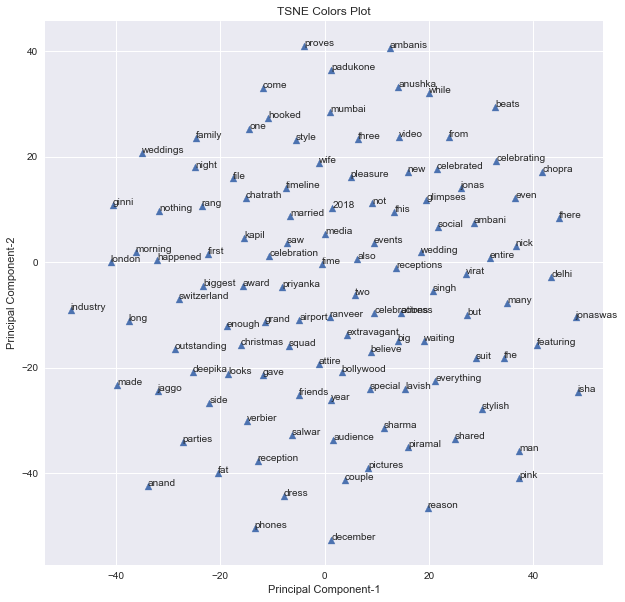

In [47]:
data = tsne_results

plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.scatter(data[:,0],data[:,1],marker='^')

keys = model.wv.vocab.keys()
for label, x, y in zip(keys, data[:,0], data[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    
plt.xlabel("Principal Component-1")
plt.ylabel("Principal Component-2")
plt.title("TSNE Colors Plot")
plt.show()

In [48]:
actors = ["ranveer","deepika","padukone","singh","nick","jonas","chopra","priyanka","virat","anushka","ginni"]


def predict_actor(a,b,c,word_vectors):
    """Accepts a triad of words, a,b,c and returns d such that a is to b : c is to d"""
    a,b,c = a.lower(),b.lower(),c.lower()
    max_similarity = -100 
    
    d = None
    words = actors
    
    wa,wb,wc = word_vectors[a],word_vectors[b],word_vectors[c]
    
    #to find d s.t similarity(|b-a|,|d-c|) should be max
    
    for w in words:
        if w in [a,b,c]:
            continue
        
        wv = word_vectors[w]
        sim = cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
    return d    

### 4. Test your Model

In [49]:
triad = ("nick","priyanka","virat")
predict_actor(*triad,word_vectors)

'anushka'

In [50]:
triad = ("ranveer","deepika","priyanka")
predict_actor(*triad,word_vectors)

'nick'

In [51]:
triad = ("ranveer","singh","deepika")
predict_actor(*triad,word_vectors)

'padukone'

In [52]:
triad = ("deepika","padukone","priyanka")
predict_actor(*triad,word_vectors)

'chopra'

In [53]:
triad = ("priyanka","jonas","nick")
predict_actor(*triad,word_vectors)

'chopra'

In [54]:
model.wv.save_word2vec_format("bollywood.bin")

C:\Users\KIIT\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
